In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Read dataset

%%time
data_path = 'interview_house_prices.csv'

try:
    data_mart_df = pd.read_csv(data_path)
except pd.errors.ParserError as e:
    print(f'Error while parsing CSV file: {e}')

data_mart_df.shape

CPU times: user 26.8 ms, sys: 12.3 ms, total: 39.1 ms
Wall time: 47.7 ms


(1460, 81)

In [4]:
data_mart_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
data_mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data_mart_df.shape, data_mart_df.Id.nunique()

((1460, 81), 1460)

In [7]:
# Check for missing values
missing_values = data_mart_df.isnull().sum()
missing_percentage = (missing_values / len(data_mart_df)) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage']))

               Missing Values  Percentage
Id                          0    0.000000
MSSubClass                  0    0.000000
MSZoning                    0    0.000000
LotFrontage               259   17.739726
LotArea                     0    0.000000
Street                      0    0.000000
Alley                    1369   93.767123
LotShape                    0    0.000000
LandContour                 0    0.000000
Utilities                   0    0.000000
LotConfig                   0    0.000000
LandSlope                   0    0.000000
Neighborhood                0    0.000000
Condition1                  0    0.000000
Condition2                  0    0.000000
BldgType                    0    0.000000
HouseStyle                  0    0.000000
OverallQual                 0    0.000000
OverallCond                 0    0.000000
YearBuilt                   0    0.000000
YearRemodAdd                0    0.000000
RoofStyle                   0    0.000000
RoofMatl                    0    0

In [64]:
# Check for missing values
missing_values = data_mart_df.isnull().sum()
missing_percentage = (missing_values / len(data_mart_df)) * 100

# Print missing values and percentages
missing_df = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_df)

# Filter features with missing percentages above 50%
missing_features = missing_df[missing_df['Percentage'] > 50].index.tolist()
print("Features with missing percentage above 50%:", missing_features)


               Missing Values  Percentage
id                          0    0.000000
mssubclass                  0    0.000000
mszoning                    0    0.000000
lotfrontage               259   17.739726
lotarea                     0    0.000000
street                      0    0.000000
alley                    1369   93.767123
lotshape                    0    0.000000
landcontour                 0    0.000000
utilities                   0    0.000000
lotconfig                   0    0.000000
landslope                   0    0.000000
neighborhood                0    0.000000
condition1                  0    0.000000
condition2                  0    0.000000
bldgtype                    0    0.000000
housestyle                  0    0.000000
overallqual                 0    0.000000
overallcond                 0    0.000000
yearbuilt                   0    0.000000
yearremodadd                0    0.000000
roofstyle                   0    0.000000
roofmatl                    0    0

In [9]:
data_mart_df.YearBuilt.max(), data_mart_df.YearBuilt.min()

(2010, 1872)

In [10]:
#YearRemodAdd
data_mart_df.YearRemodAdd.max(), data_mart_df.YearRemodAdd.min()

(2010, 1950)

In [11]:
data_mart_df.BsmtFullBath.head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

In [12]:
# Method for reducing the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [13]:
df = reduce_mem_usage(data_mart_df)

Mem. usage decreased to  0.57 Mb (36.4% reduction)


In [14]:
# Replace uppercase characters of dataframe column names with lowercase
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
  

In [16]:
# Create bins for 'saleprice'
bins = [df['saleprice'].min(),
        #df['saleprice'].mean() - df['saleprice'].std(),
        df['saleprice'].mean(),
        df['saleprice'].mean() + df['saleprice'].std(),
        df['saleprice'].max()]

# Split dataset acording to the bins
bins_df = pd.cut(df['saleprice'], bins=bins)

# Create groups with bins
data_set_size = df.groupby(bins_df).size().reset_index(name='count')

print("Bins and sizes:")
print(data_set_size)

Bins and sizes:
                    saleprice  price
0     (34900.0, 208830.28125]   1068
1  (208830.28125, 972618.125]    386
2    (972618.125, 22670000.0]      2


In [17]:
df.mszoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

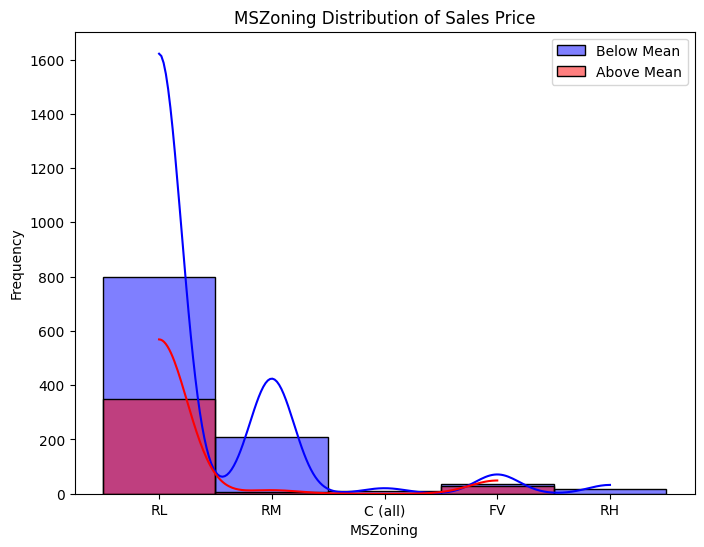

In [18]:
# Visualize distribution of mszoning over saleprice
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['saleprice'] < df['saleprice'].mean()], x='mszoning', bins=50, kde=True, color='blue', label='Below Mean')
sns.histplot(data=df[df['saleprice'].mean() < df['saleprice']], x='mszoning', bins=50, kde=True, color='red', label='Above Mean')

plt.title('MSZoning Distribution of Sales Price')
plt.xlabel('MSZoning')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [19]:
df.lotfrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: lotfrontage, dtype: float16

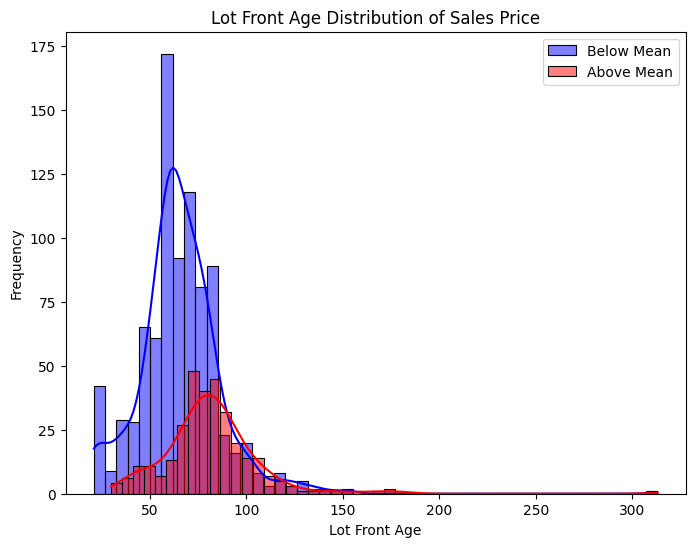

In [20]:
# Visualize distribution of lotfrontage over saleprice
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['saleprice'] < df['saleprice'].mean()], x='lotfrontage', bins=50, kde=True, color='blue', label='Below Mean')
sns.histplot(data=df[df['saleprice'].mean() < df['saleprice']], x='lotfrontage', bins=50, kde=True, color='red', label='Above Mean')

plt.title('Lot Front Age Distribution of Sales Price')
plt.xlabel('Lot Front Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


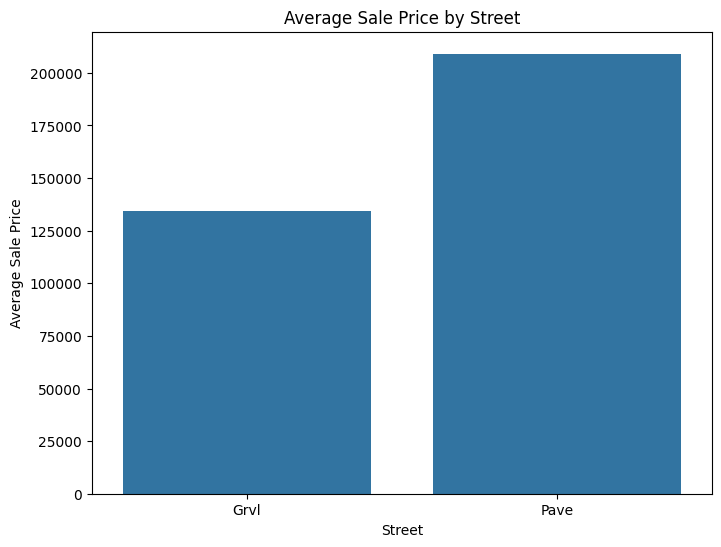

In [21]:
# Visualize distribution of saleprice over Street
# Group the data by LandSlope and calculate the average sale price
avg_sales_by_slope = df.groupby('street')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_slope, x='street', y='saleprice')
plt.title('Average Sale Price by Street')
plt.xlabel('Street')
plt.ylabel('Average Sale Price')
plt.show()


In [22]:
df.utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

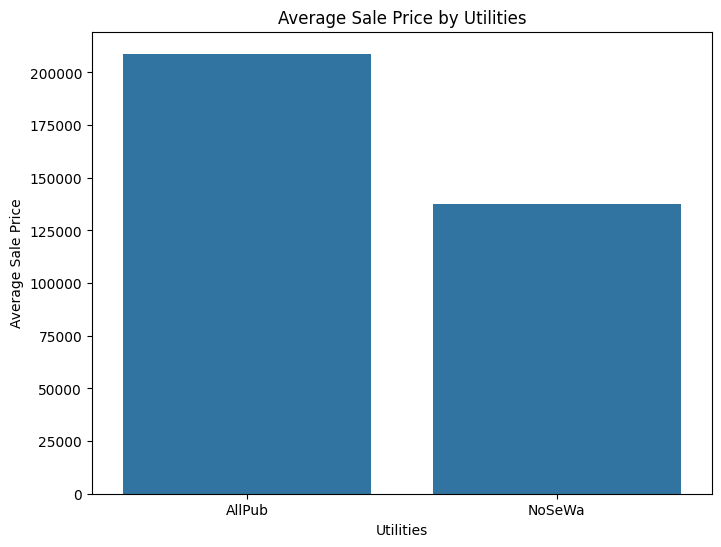

In [23]:
# Visualize distribution of saleprice over utilities
# Group the data by utilities and calculate the average sale price
avg_sales_by_slope = df.groupby('utilities')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_slope, x='utilities', y='saleprice')
plt.title('Average Sale Price by Utilities')
plt.xlabel('Utilities')
plt.ylabel('Average Sale Price')
plt.show()



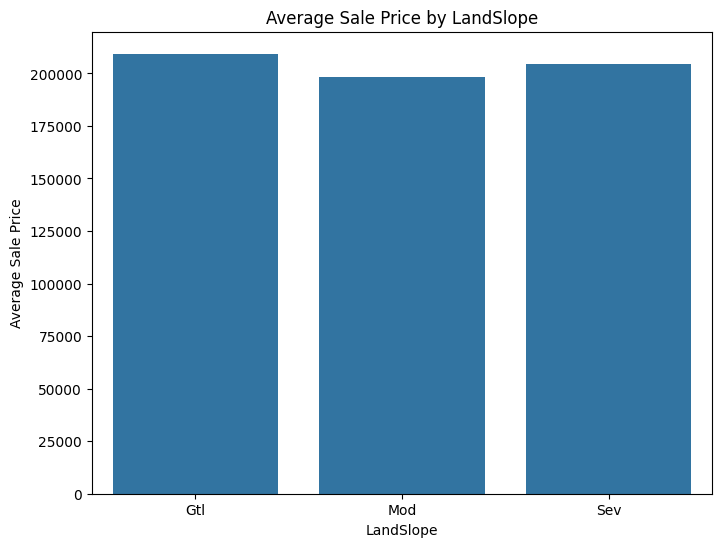

In [24]:
# Group the data by LandSlope and calculate the average sale price
avg_sales_by_slope = df.groupby('landslope')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_slope, x='landslope', y='saleprice')
plt.title('Average Sale Price by LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Average Sale Price')
plt.show()

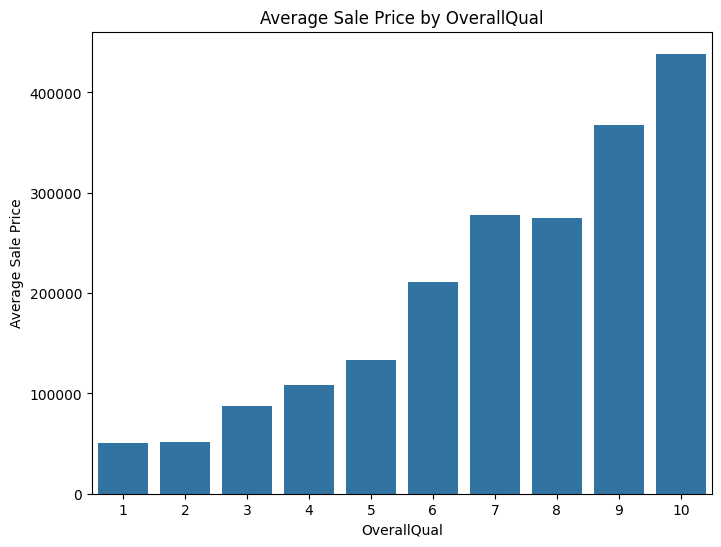

In [25]:
# Group the data by OverallQual and calculate the average sale price
avg_sales_by_slope = df.groupby('overallqual')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_slope, x='overallqual', y='saleprice')
plt.title('Average Sale Price by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Average Sale Price')
plt.show()

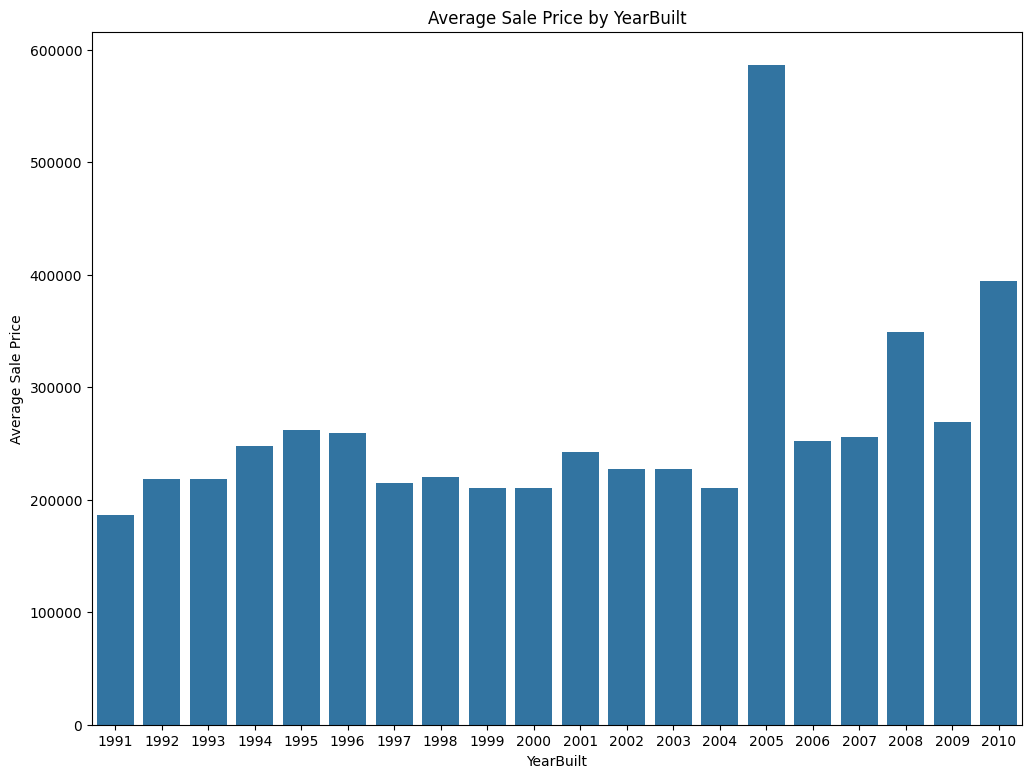

In [26]:
# Group the data by YearBuilt and calculate the average sale price
avg_sales_by_slope = df[df.yearbuilt > 1990].groupby('yearbuilt')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(12, 9))
sns.barplot(data=avg_sales_by_slope, x='yearbuilt', y='saleprice')
plt.title('Average Sale Price by YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Average Sale Price')
plt.show()

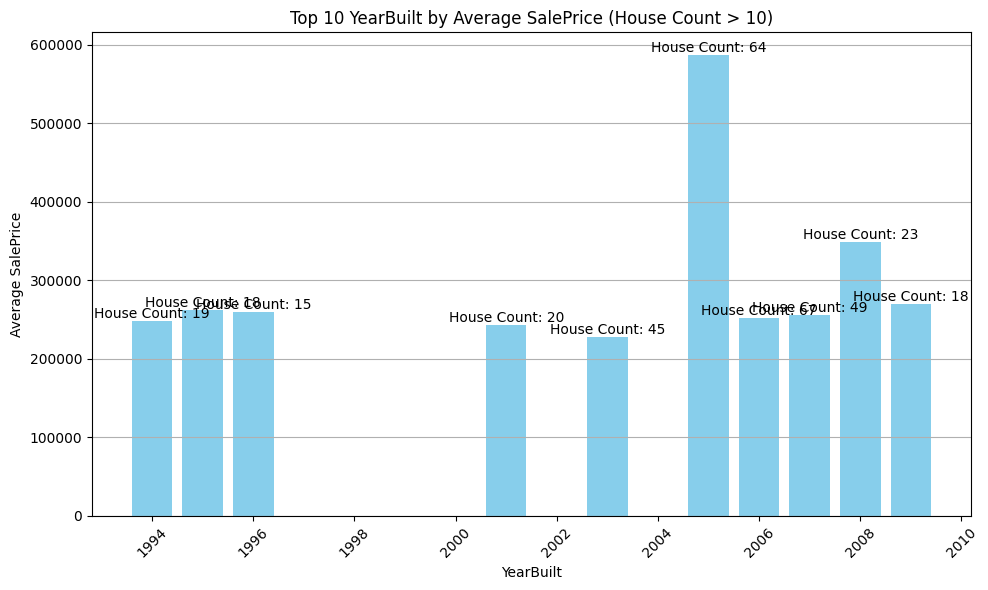

In [30]:

# Group by YearBuilt and calculate the average SalePrice
avg_sales_by_yearbuilt = df.groupby('yearbuilt')['saleprice'].mean().reset_index()

# Sort by average SalePrice in descending order and get the top 100
top_avg_sales = avg_sales_by_yearbuilt.sort_values(by='saleprice', ascending=False).head(100)

# Filter yearbuilt categories with more than 10 houses
top_avg_sales_filtered = top_avg_sales[top_avg_sales['yearbuilt'].map(df['yearbuilt'].value_counts()) > 10]

# Sort by average SalePrice in descending order and get the top 10
top_avg_sales_filtered = top_avg_sales_filtered.sort_values(by='saleprice', ascending=False).head(10)

# Visualize with plotbar
plt.figure(figsize=(10, 6))
plt.bar(top_avg_sales_filtered['yearbuilt'], top_avg_sales_filtered['saleprice'], color='skyblue')
plt.xlabel('YearBuilt')
plt.ylabel('Average SalePrice')
plt.title('Top 10 YearBuilt by Average SalePrice (House Count > 10)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Her yıl için ev sayısını ekleme
for idx, row in top_avg_sales_filtered.iterrows():
    year_built = row['yearbuilt']
    house_count = df[df.yearbuilt == year_built].shape[0]
    plt.text(year_built, row['saleprice'], f'House Count: {house_count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


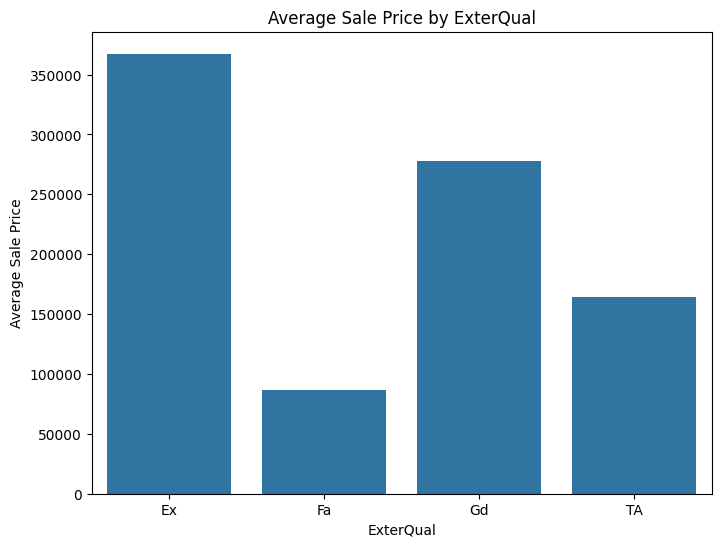

In [32]:
#ExterQual
# Group the data by exterqual and calculate the average sale price
avg_sales_by_slope = df.groupby('exterqual')['saleprice'].mean().reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_slope, x='exterqual', y='saleprice')
plt.title('Average Sale Price by ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Average Sale Price')
plt.show()

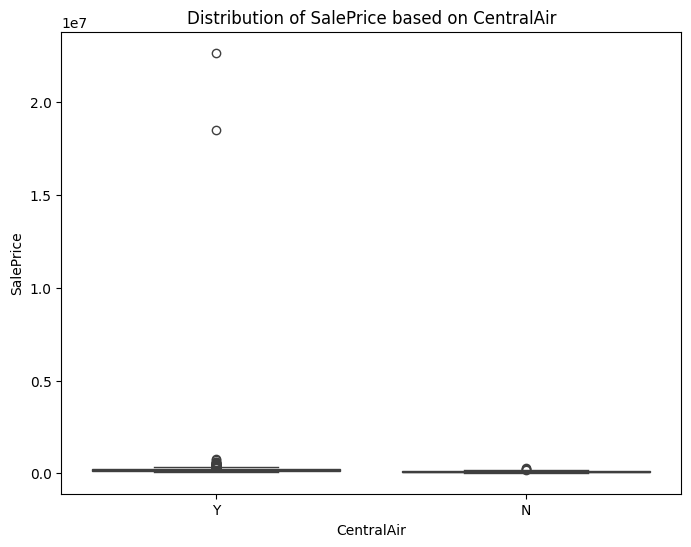

In [33]:
# Visualize distribution of SalePrice based on CentralAir
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='centralair', y='saleprice')
plt.title('Distribution of SalePrice based on CentralAir')
plt.xlabel('CentralAir')
plt.ylabel('SalePrice')
plt.show()

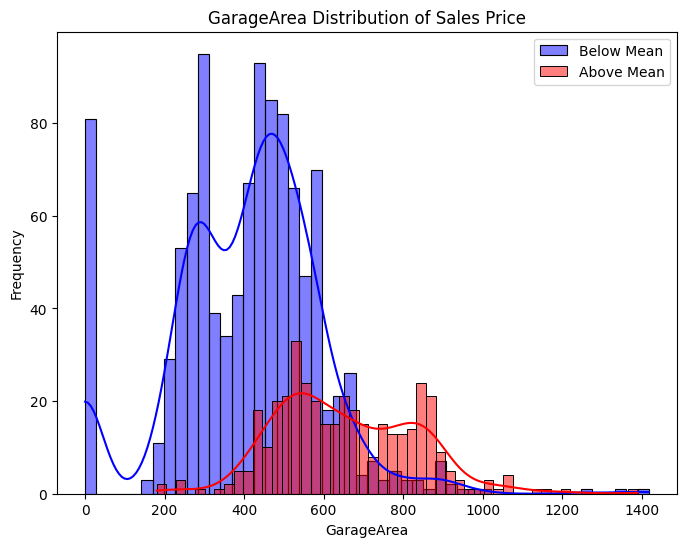

In [53]:
# Visualize distribution of GarageArea over SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['saleprice'] < df['saleprice'].mean()], x='garagearea', bins=50, kde=True, color='blue', label='Below Mean')
sns.histplot(data=df[df['saleprice'].mean() < df['saleprice']], x='garagearea', bins=50, kde=True, color='red', label='Above Mean')

plt.title('GarageArea Distribution of Sales Price')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.legend()
plt.show()



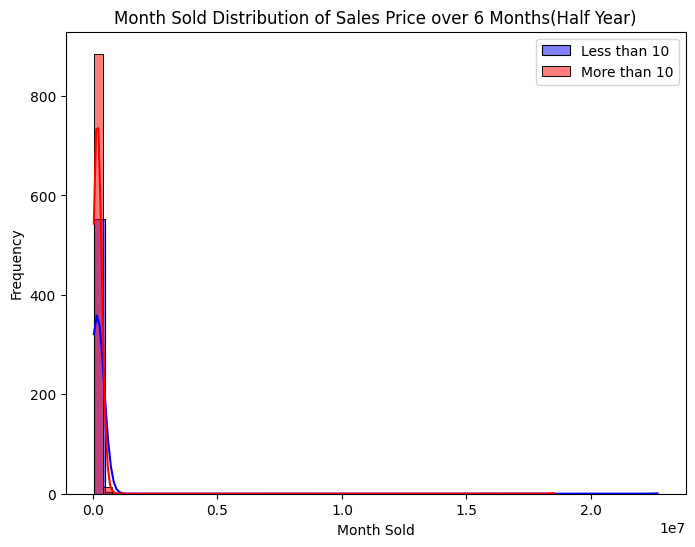

In [63]:
#Month Sold
# Visualize distribution of Month Sold over SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['mosold'] < 6], x='saleprice', bins=50, kde=True, color='blue', label='Less than 10')
sns.histplot(data=df[df['mosold'] >= 6], x='saleprice', bins=50, kde=True, color='red', label='More than 10')

plt.title('Month Sold Distribution of Sales Price over 6 Months(Half Year)')
plt.xlabel('Month Sold')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [57]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
  

In [58]:
df['mosold'].head()

0     2
1     5
2     9
3     2
4    12
Name: mosold, dtype: int8